# 使用手寫辨識資料集, 觀察 PCA 算法

# [作業目標]
- 試著模仿範例寫法, 以變更參數後的 PCA + 邏輯斯迴歸判斷手寫辨識資料集, 觀察不同 component 下正確率的變化

# [作業重點]
- 以手寫辨識資料集, 觀察變更參數後的 PCA 算法, 在取不同 component 時, PCA 解釋度與分類正確率如何變化 (In[5], Out[5])

In [1]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
# 定義 PCA 與隨後的羅吉斯迴歸函數
# penalty 改為 L1, max_iter 改為 100
logistic = SGDClassifier(loss='log', penalty='l1', max_iter=100, tol=1e-5, random_state=0)
pca = PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

# 載入手寫數字辨識集
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

# 作業
* 將參數 penalty 改為 L1, max_iter 改為 100, 觀察 PCA 與羅吉斯迴歸做手寫辨識的效果

In [3]:
# 先執行 GridSearchCV 跑出最佳參數
para_grid = {
    'pca__n_components': [4, 10, 20, 30, 40, 50, 64],
    'logistic__alpha':[0.01, 0.001, 0.0001]
    }

Gsearch = GridSearchCV(pipe, para_grid, iid=False, cv=5, return_train_score=False)
Gsearch.fit(X_digits, y_digits)
print("Best parameter (CV score=%0.3f):" % Gsearch.best_score_)
print(Gsearch.best_params_)

Best parameter (CV score=0.914):
{'logistic__alpha': 0.01, 'pca__n_components': 30}


In [4]:
pca.fit(X_digits)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

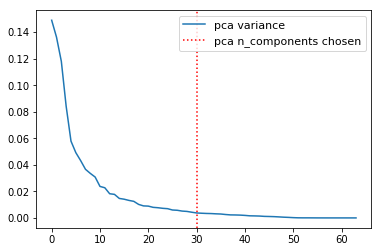

In [5]:
# 繪製不同 components 的 PCA 解釋度
fig, ax1 = plt.subplots()
ax1.plot(pca.explained_variance_ratio_, label='pca variance')
ax1.axvline(Gsearch.best_params_['pca__n_components'], linestyle=':', c='r', label='pca n_components chosen')
ax1.legend(prop=dict(size=11))

In [6]:
results = pd.DataFrame(Gsearch.cv_results_)
best_clfs = results.groupby('param_pca__n_components').apply(lambda x:x.nlargest(1, 'mean_fit_time'))

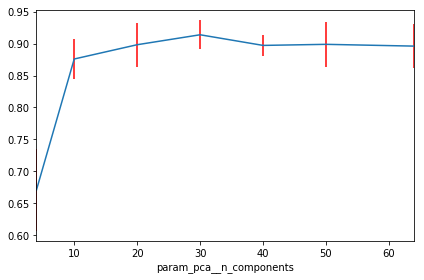

In [7]:
fig, ax2 = plt.subplots()
best_clfs.plot(x='param_pca__n_components', y='mean_test_score', yerr='std_test_score', ecolor='r', legend=False, ax=ax2)
plt.tight_layout()
plt.show()